## The Spark Foundation **#GRIPJUN2021**
### **Data Science & Business Analyst**

### Task 2 : Prediction using Unsupervised ML

**Problem Statment**
* From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

#### By - Hrishikesh Helge

---

Import essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load dataset

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


To find optimum number of clusters we'll use K-means, We'll start with finding K's value first!

To find value of K we'll use K-elbow method

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Plotting the K-elbow graph

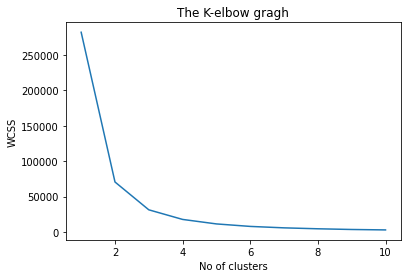

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The K-elbow gragh')
plt.xlabel('No of clusters')
plt.ylabel('WCSS') # Within cluster sum of squared
plt.show()

* From the above graph we can see that our elbow point is somewear between 2 & 4

* K = 3 (No of clusters)

Applying the K-means cluster algorithm

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, 
                random_state=0)
y_kmeans = kmeans.fit_predict(x)

Visualising the clusters 

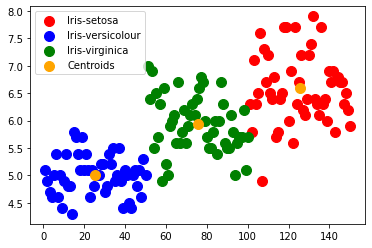

In [ ]:
# Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')

plt.legend()